In [5]:
%matplotlib inline
import caffe
import numpy as np
import matplotlib.pyplot as plt
caffe_root = '/home/gridsan/salford/caffe/'
model_def = caffe_root + 'mnist2/lenet300-100.prototxt'
model_weights = caffe_root + 'mnist2/models/lenet300-100_iter_10000_v1.caffemodel'
net = caffe.Net(model_def, model_weights, caffe.TEST)

In [2]:
caffe_root = '/home/gridsan/salford/caffe/'
#model_def = caffe_root + 'mnist2/lenet5.prototxt'
#model_weights = caffe_root + 'mnist2/models/lenet5_iter_10000_v1.caffemodel'
model_def = caffe_root + 'mnist2/lenet300-100.prototxt'
model_weights = caffe_root + 'mnist2/models/lenet300-100_iter_10000_v1.caffemodel'

In [ ]:
net = caffe.Net(model_def, model_weights, caffe.TEST)

In [ ]:
net.forward()

In [ ]:
print(net.blobs['conv1'].data.shape)
print(net.params.keys())
print(net.params['conv1'][0].data.shape)
print(net.params['conv1'][1].data.shape)

In [ ]:
def sparsify(net, threshold, layers = None):
    if layers is None:
        layers = net.params.keys()
    total_size = 0
    nonzero_els = 0
    for layer in net.params.keys(): # have to do all to measure sparsity correctly
        for data_blob in net.params[layer]: # there are two: the FC layer and the bias vector
            data_array = data_blob.data
            if layer in layers:
                data_array[np.abs(data_array) < threshold] = 0
            total_size += data_array.size
            nonzero_els +=  np.count_nonzero(data_array)
    return float(total_size - nonzero_els) / total_size

In [ ]:
%matplotlib inline
import caffe
import numpy as np
import matplotlib.pyplot as plt
caffe_root = '/home/gridsan/salford/caffe/'
model_def = caffe_root + 'mnist2/lenet300-100.prototxt'
model_weights = caffe_root + 'mnist2/models/lenet300-100_iter_10000_v1.caffemodel'
net = caffe.Net(model_def, model_weights, caffe.TEST)

def sparsify(net, threshold, layers = None):
    if layers is None:
        layers = net.params.keys()
    total_size = 0
    nonzero_els = 0
    for layer in net.params.keys(): # have to do all to measure sparsity correctly
        for data_blob in net.params[layer]: # there are two: the FC layer and the bias vector
            data_array = data_blob.data
            if layer in layers:
                data_array[np.abs(data_array) < threshold] = 0
            total_size += data_array.size
            nonzero_els +=  np.count_nonzero(data_array)
    return float(total_size - nonzero_els) / total_size

def sparsity_test(net, thresholds):
    accs = []
    sparsities = []
    for threshold in thresholds:
        sparsity = sparsify(net, threshold)
        result_dict = net.forward()
        accuracy = np.asscalar(result_dict['accuracy'])
        accs.append(accuracy)
        sparsities.append(sparsity)
    return accs, sparsities

In [ ]:
thresholds = np.linspace(0, 0.025, 21)
print(thresholds)

In [ ]:
accs, sparsities = sparsity_test(net, thresholds)
errors = [1 - a for a in accs]

In [ ]:
print(accs)
print(sparsities)

In [ ]:
fig = plt.figure()
plt.plot(thresholds, errors, label = 'accuracy')
plt.plot(thresholds, sparsities, label='sparsity')
plt.title('Lenet-5 on MNIST accuracy vs pruning threshold')
plt.xlabel('Pruning threshold')
plt.ylabel('Test set accuracy/Overall model sparsity')
plt.legend()

In [11]:
fig.savefig('Lenet5_plot2.png')

In [10]:
plt.figure()
fig = plt.gcf()

data_blob = net.params['ip1'][0]

ylim  = [0, 1000]
ylim2 = [1000, 3000]
ylimratio = (ylim[1]-ylim[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
ylim2ratio = (ylim2[1]-ylim2[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
gs = gridspec.GridSpec(2, 1, height_ratios=[ylimratio, ylim2ratio])
fig = plt.figure()
ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax.hist(np.ravel(data_blob.data), bins=50)
ax2.hist(np.ravel(data_blob.data), bins=50)
ax.set_ylim(ylim)
ax2.set_ylim(ylim2)
plt.subplots_adjust(hspace=0.03)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')
ax2.xaxis.tick_bottom()
 
ax2.set_xlabel('xlabel')
ax2.set_ylabel('ylabel')
ax2.yaxis.set_label_coords(0.05, 0.5, transform=fig.transFigure)

kwargs = dict(color='k', clip_on=False)
xlim = ax.get_xlim()
dx = .02*(xlim[1]-xlim[0])
dy = .01*(ylim[1]-ylim[0])/ylimratio
ax.plot((xlim[0]-dx,xlim[0]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)
ax.plot((xlim[1]-dx,xlim[1]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)
dy = .01*(ylim2[1]-ylim2[0])/ylim2ratio
ax2.plot((xlim[0]-dx,xlim[0]+dx), (ylim2[1]-dy,ylim2[1]+dy), **kwargs)
ax2.plot((xlim[1]-dx,xlim[1]+dx), (ylim2[1]-dy,ylim2[1]+dy), **kwargs)
ax.set_xlim(xlim)
ax2.set_xlim(xlim)

plt.savefig('/home/gridsan/salford/lenet5_funn.png')

NameError: name 'net' is not defined

In [9]:
plt.figure()
data_blob = net.params['ip1'][0]
plt.hist(np.ravel(data_blob.data), bins=50)
plt.xlabel('weight bin')
plt.ylabel('number of connections')
plt.title('ip fun')
plt.gcf().savefig('/home/gridsan/salford/Lenet5_fun_ip.png') 

NameError: name 'net' is not defined

In [13]:
# note: keep in mind these graphs may be representative of pruned network
def weight_hists(net):
    layers = net.params.keys()
    print(layers)
    for layer in layers:
        bias = 0
        for data_blob in net.params[layer]:
            print(layer)
            plt.hist(np.ravel(data_blob.data), bins=50)
            plt.xlabel('weight bin')
            plt.ylabel('number of connections')
            if bias == 0:
                plt.title(layer)
                plt.gcf().savefig('/home/gridsan/salford/Lenet5_unpruned_' + str(layer) + '.png')
            else: 
                plt.title(layer + ' bias')
                plt.gcf().savefig('/home/gridsan/salford/Lenet5_unpruned_' + str(layer) + 'bias.png')
            plt.figure()
            bias+=1

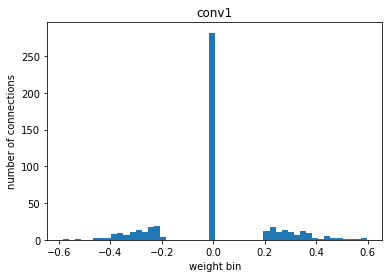

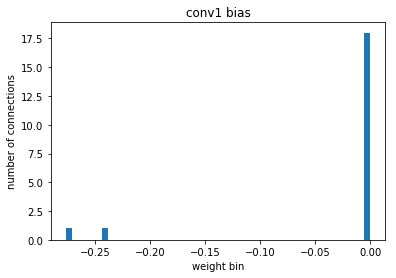

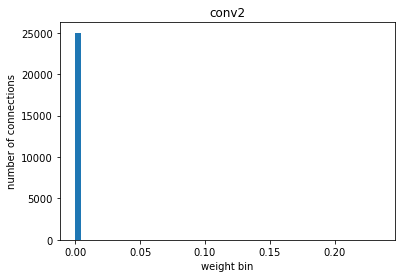

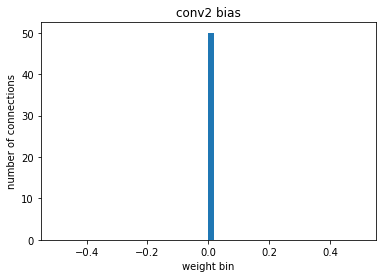

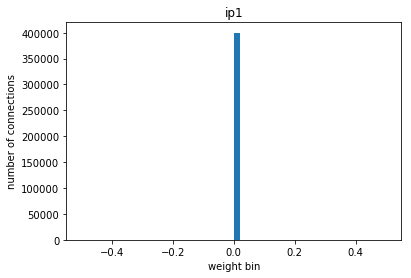

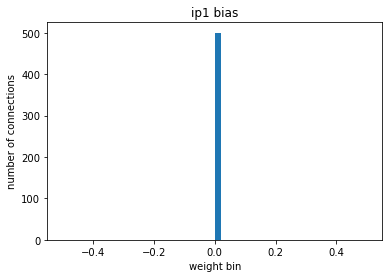

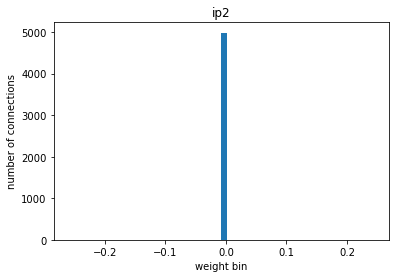

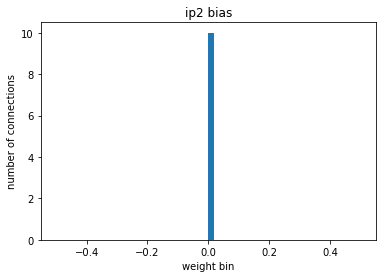

In [14]:
weight_hists(net)